# Fibonachi

Import **matplotlib** library for visualazing.

In [4]:
import matplotlib.pyplot as plt

Define a **decorator** to **count function calls**. 

It count how many times function with certain value will be called when calcuting for example 10th Fibonachi.

In [5]:
def count_calls(counter):
    def decorator(func):
        def wrapper(x):
            counter[x] = 1 if x not in counter else counter[x]+1
            return func(x)
        return wrapper
    return decorator

## Recursive Algorithm

Recursive algorithm with no optimization.

In [6]:
def Recursive_fib(x):
    counter = {}
    @count_calls(counter)
    def fib_recur(x):
        if x == 0 or x == 1:
            return 1
        else:
            return fib_recur(x-1) + fib_recur(x-2)
    return fib_recur(x),counter

The value of **10th Fibonachi** with this algorithm is:

In [7]:
x,recur_count_10 = Recursive_fib(10)
print("The value is:",x)

The value is: 89


### Number of calls

when calcuting 10th fibonachi.


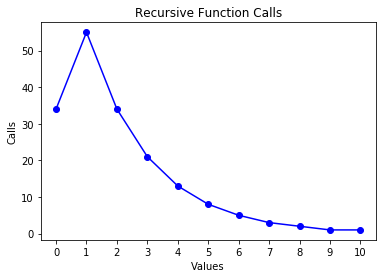

In [8]:
values, calls = zip(*sorted(recur_count_10.items()))
plt.plot(values, calls,'bo-')
plt.xlabel('Values')
plt.ylabel('Calls')
plt.title('Recursive Function Calls')
plt.xticks(list(range(0,11,1)))
plt.show()

## Memoizing Algorithm

Recursive algorithm using a cache dictionary to memoising the results and speed up.

In [9]:
def Memoizing_fib(x):
    counter = {}
    cache = {}
    @count_calls(counter)
    def fib_memo(x):
        if x in cache:
            return cache[x]
        else:
            if x == 0 or x == 1:
                cache[x] = 1
                return cache[x]
            else:
                cache[x] = fib_memo(x-1) + fib_memo(x-2)
                return cache[x]
    return fib_memo(x),counter

The value of 10th Fibonachi with this algorithm is:

In [10]:
x, memo_count_10 = Memoizing_fib(10)
print("The value is:",x)

The value is: 89


### Number of calls

when calcuting 10th fibonachi.


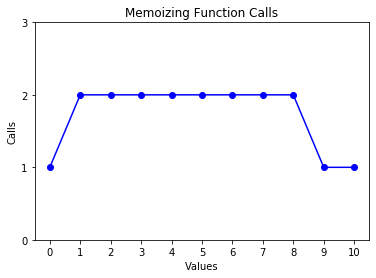

In [11]:
values, calls = zip(*sorted(memo_count_10.items()))
plt.plot(values, calls,'bo-')
plt.xlabel('Values')
plt.ylabel('Calls')
plt.title('Memoizing Function Calls')
plt.xticks(list(range(0,11,1)))
plt.yticks([0,1,2,3])
plt.show()

## Comparing Two Algorithm

Defining a function to calcute total function call.

In [12]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

Calcute total call for 10th fibonachi number in both algorithm.

In [13]:
total_recur_10 = get_total(recur_count_10)
total_memo_10 = get_total(memo_count_10)

### Number of total calls side by side

For Recursive it's **177**.
and For memoization it's **19**.

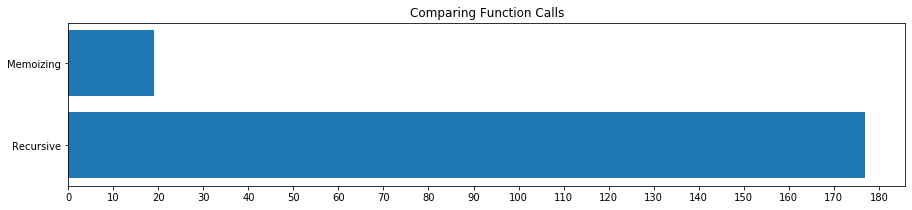

In [14]:
plt.figure(figsize=(15, 3))
plt.xticks(list(range(0,190,10)))
plt.barh(['Recursive','Memoizing'],[total_recur_10,total_memo_10])
plt.title('Comparing Function Calls')
plt.show()

### Growth of Algorithms

Calcute total number of calls for calcuting first to 10th fibonachi with both algorithms.

In [26]:
growth_recur = {}
for i in range(1,21):
    x,recur_count = Recursive_fib(i)
    t_i = get_total(recur_count)
    growth_recur[i] = t_i
print('done')

done


In [27]:
growth_memo = {}
for i in range(1,21):
    x,memo_count = Memoizing_fib(i)
    t_i = get_total(memo_count)
    growth_memo[i] = t_i
print('done')

done


Visualazing Growth of both Algorithm Side by Side.  
Growth of **Recursive** is **Exponantial**: **O(2^n)**  
Growth of **Memoizing** is **Linear**: **O(2n)**

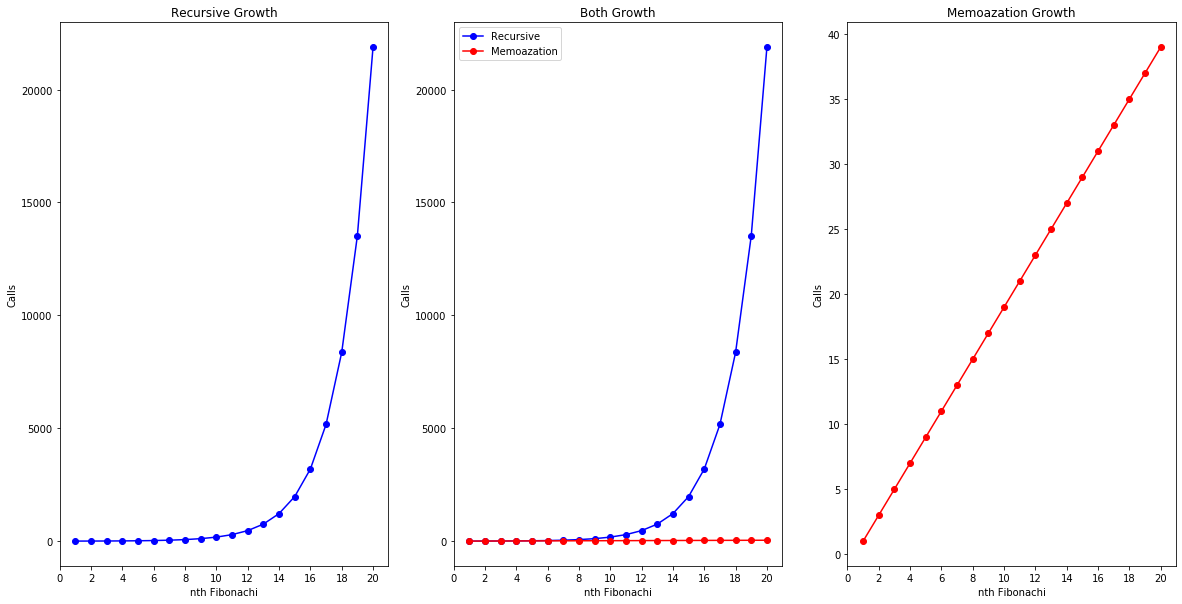

In [40]:
plt.figure(figsize=(20, 10))

values, calls = zip(*sorted(growth_recur.items()))
values2, calls2 = zip(*sorted(growth_memo.items()))
plt.subplot(131)
plt.plot(values,calls,'bo-')
plt.title("Recursive Growth")
plt.xticks(list(range(0,21,2)))
plt.xlabel("nth Fibonachi")
plt.ylabel('Calls')

plt.subplot(133)
plt.plot(values2,calls2,'ro-')
plt.title("Memoazation Growth")
plt.xticks(list(range(0,21,2)))
plt.xlabel("nth Fibonachi")
plt.ylabel('Calls')

plt.subplot(132)
plt.plot(values, calls,'bo-',values2,calls2,'ro-')
plt.legend(['Recursive','Memoazation'])
plt.xlabel("nth Fibonachi")
plt.ylabel('Calls')
plt.xticks(list(range(0,21,2)))
plt.title('Both Growth')

plt.show()